In [1]:
import numpy as np
import matplotlib.pyplot as plt

from oblate_lc import PlanetSystem

### Set up transit parameters

The state dictionary holds all the parameters for an exoplanet's orbit. We can see all the parameters that can be varied by taking a look at the attributes of `PlanetSystem`:

In [2]:
help(PlanetSystem)

Help on class PlanetSystem in module oblate_lc:

class PlanetSystem(builtins.object)
 |  PlanetSystem(t0=0, tref=0, times=None, per=None, req=None, rpol=None, rstar_eq=1, rstar_pol=1, reff=None, f=0, a=None, b=None, ecc=0, w=3.141592653589793, u=[0.0, 0.0], theta_p=0, theta_s=0, pos_star=(0, 0), omega=0, only_nintpts=False, dist=False)
 |  
 |  Object that stores all the transit model parameters
 |  
 |  Attributes
 |  ----------
 |  t0 : float
 |      time of inferior conjunction, in days
 |  tref : float
 |      reference time for transit, in days
 |  per : float
 |      orbital period, in days
 |  req : float
 |      equatorial radius of planet
 |  rprstar : float
 |      rp/rstar
 |  rpol : float
 |      polar radius of planet
 |  rstar_eq : float
 |      equatorial radius of star
 |  rstar_pol : float
 |      polar radius of star
 |  reff : float
 |      effective radius of planet
 |  f : float
 |      oblateness
 |  a : float
 |      semi-major axis, in units of R*
 |  b : float


In [4]:
state = {"reff": 0.12, "f": 0.1, "per": 1071.23228, "a": 560, "b": 0.23, "t0": 253.28699, "theta_p": np.pi/2, "omega": 3.5, "times": np.linspace(-1, 1, 1000)}
times = state["times"]
planet = PlanetSystem(**state)
flux_obl, nintpts = planet.lightcurve()

#### Let's plot the lightcurve!

Text(0, 0.5, 'Normalized Flux')

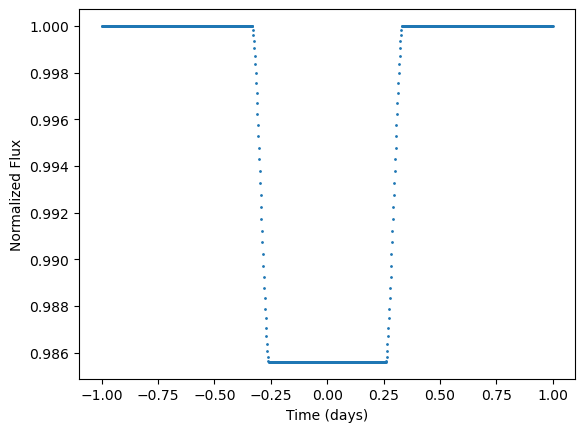

In [10]:
plt.scatter(times, flux_obl, s = 1)
plt.xlabel("Time (days)")
plt.ylabel("Normalized Flux")

Compare this oblate lightcurve to a spherical one:

In [6]:
state["f"] = 0
planet = PlanetSystem(**state)
flux_sph, nintpts = planet.lightcurve()

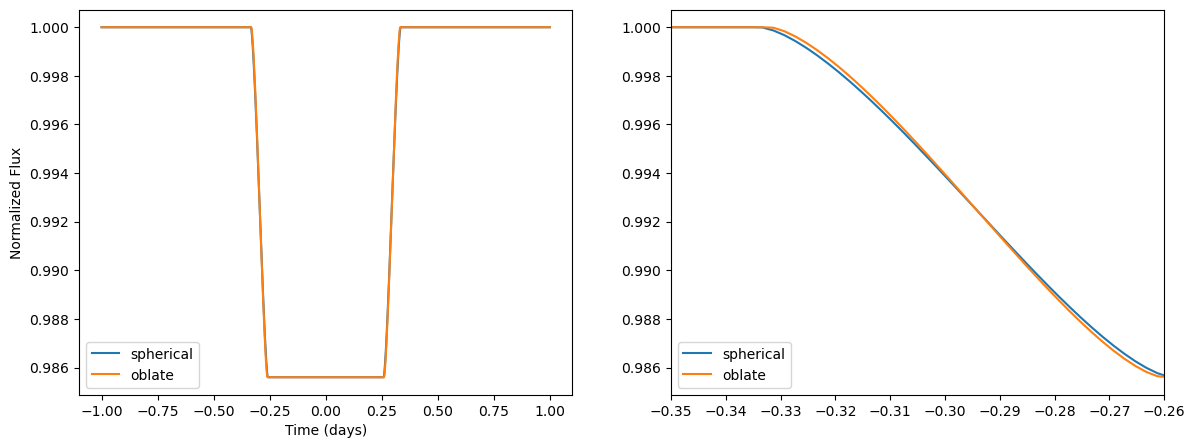

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(times, flux_sph, label = "spherical")
ax[0].plot(times, flux_obl, label = "oblate")
ax[1].plot(times, flux_sph, label = "spherical")
ax[1].plot(times, flux_obl, label = "oblate")
ax[1].set_xlim(-0.35, -0.26)
ax[0].set_xlabel("Time (days)")
ax[0].set_ylabel("Normalized Flux")
ax[0].legend()
ax[1].legend(loc = "lower left")

Proof that they are slightly different!

Text(0, 0.5, 'Flux Difference [ppm]')

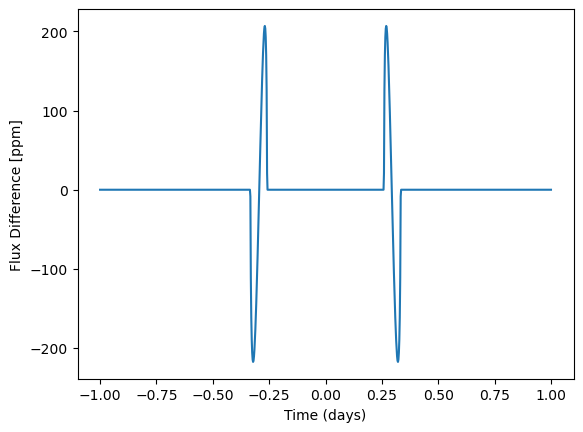

In [11]:
plt.plot(times, (flux_sph-flux_obl)*1e6)
plt.xlabel("Time (days)")
plt.ylabel("Flux Difference [ppm]")

And here we get the characteristic residual for an oblate planet when fitting a spherical model to an oblate lightcurve.